# Pre-requisites

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Ingestion

In [3]:
df = pd.read_csv('data/auto-mpg-treated.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    392 non-null    int64  
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    float64
 4   horsepower    392 non-null    int64  
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   age           392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 24.6 KB


all independent variables are numeric

## Train, Test split

In [5]:
# 
X = df[['horsepower']]
y = df['mpg']

In [6]:
xTrain, xTest, yTrain, yTest = train_test_split(X,y, test_size=0.2)
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(313, 1) (79, 1) (313,) (79,)


In [7]:
xTrain.sample(5)

,horsepower
30,150
174,90
18,100
367,68
359,150


# Standardization

In [10]:
scaler = StandardScaler().fit(xTrain)
type(scaler)

sklearn.preprocessing._data.StandardScaler

In [11]:
# use the same scaler model to apply the same transformation to train and test set
xTrainScaled = scaler.transform(xTrain)
xTestScaled = scaler.transform(xTest)

# Training

In [19]:
model = LinearRegression().fit(xTrainScaled, yTrain)

In [23]:
# evaluating how the model performs on the training set
# R2 score measure how well the model captures variation in the training data
model.score(xTrainScaled, yTrain)

0.6232348707057743

In [24]:
# predicting mpg using the model fit with horsepower
yPred = model.predict(xTestScaled)
yPred.shape

(79,)

In [ ]:
# evaluating how the model performs on the test set
# R2 score measure how well the model captures variation in the test data
r2_score(yTest, yPred)

0.4904422622249155

model's performance on the test set is poorer than the training set. there might be slight overfitting.

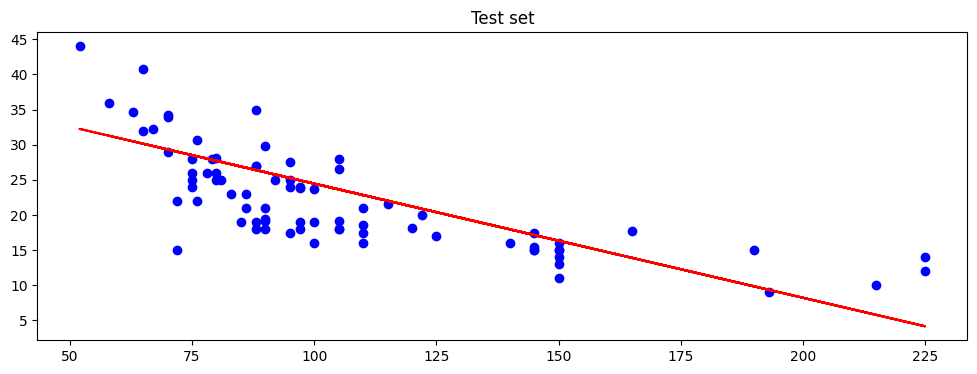

In [39]:
# visualizing the model and the test data

plt.figure(figsize=(12,4))
plt.scatter(xTest, yTest, color='b')
plt.plot(xTest, yPred, color='r')
plt.title('Test set')
plt.show()